# WeatherPy


#### Observation 
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. It is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. In northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities   = []
# Create a set of random lat and lng combinations
lats     = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs     = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)
# print(cities)

574

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Main Url
MainUrl = "http://api.openweathermap.org/data/2.5/weather?"
# Params 
Units = "Imperial"
Api   = weather_api_key
X     = cities

## Display All The Results; 
# for city in cities:
#     NewUrl  = MainUrl+"units="+units+"&APPID="+Api+"&q="+city
#     Weather = requests.get(NewUrl).json()
#     #print(Weather)
#     print(json.dumps(Weather, indent=4, sort_keys=True))

# Create DataFrame For City Data
WeatherDf         = pd.DataFrame(cities)
WeatherDf.columns = ["City"]
#WeatherDf.head()

# Set Additional Columns; 
WeatherDf['Lat']        = ""
WeatherDf['Lng']        = ""
WeatherDf['Max_Temp']   = ""
WeatherDf['Humidity']   = ""
WeatherDf['Cloudiness'] = ""
WeatherDf['Wind_Speed'] = ""
WeatherDf['Country']    = ""
WeatherDf['Date']       = ""

# Data Retrieval
Record = 0
set    = 1
print("Beginning Data Retrieval")
print("------------------------------")

for index, row in WeatherDf.iterrows():
    city = row['City']
    
    try:
        NewUrl  = MainUrl + "units=" + Units + "&APPID=" +Api +"&q=" + city
        Weather = requests.get(NewUrl).json() 
        print(f"processing record {Record} of set {set} | {city}")  
        WeatherDf.loc[index, 'Lat']        = Weather['coord']['lat']
        WeatherDf.loc[index, 'Lng']        = Weather['coord']['lon']
        WeatherDf.loc[index, 'Max_Temp']   = Weather['main']['temp_max']
        WeatherDf.loc[index, 'Humidity']   = Weather['main']['humidity']
        WeatherDf.loc[index, 'Cloudiness'] = Weather['clouds']['all']
        WeatherDf.loc[index, 'Wind_Speed'] = Weather['wind']['speed']
        WeatherDf.loc[index, 'Country']    = Weather['sys']['country']
        WeatherDf.loc[index, 'Date']       = Weather['dt']
        
        Record = Record + 1
        if Record >= 51:
            Record= 0
            set = set + 1     
    except (KeyError, IndexError):
        print("City not found. Skipping...")    
print("---------------------------")
print("Data Retrieval Complete ")
print("---------------------------")

Beginning Data Retrieval
------------------------------
processing record 0 of set 1 | albany
processing record 1 of set 1 | rikitea
processing record 2 of set 1 | miracatu
processing record 3 of set 1 | punta arenas
processing record 4 of set 1 | santa gertrudis
processing record 5 of set 1 | georgetown
processing record 6 of set 1 | belushya guba
City not found. Skipping...
processing record 6 of set 1 | nakambala
processing record 7 of set 1 | pahrump
processing record 8 of set 1 | carnarvon
processing record 9 of set 1 | payyannur
processing record 10 of set 1 | raudeberg
processing record 11 of set 1 | taolanaro
City not found. Skipping...
processing record 11 of set 1 | tilichiki
processing record 12 of set 1 | busselton
processing record 13 of set 1 | hermanus
processing record 14 of set 1 | isangel
processing record 15 of set 1 | sentyabrskiy
City not found. Skipping...
processing record 15 of set 1 | katsuura
processing record 16 of set 1 | lavrentiya
processing record 17 of s

processing record 17 of set 4 | high level
processing record 18 of set 4 | tasiilaq
processing record 19 of set 4 | vardo
processing record 20 of set 4 | sechura
processing record 21 of set 4 | tautira
processing record 22 of set 4 | provideniya
processing record 23 of set 4 | mount gambier
processing record 24 of set 4 | matara
processing record 25 of set 4 | saldanha
processing record 26 of set 4 | saskylakh
processing record 27 of set 4 | the valley
processing record 28 of set 4 | gidole
processing record 29 of set 4 | labuhan
processing record 30 of set 4 | ilulissat
processing record 31 of set 4 | portland
processing record 32 of set 4 | erenhot
processing record 33 of set 4 | toftir
City not found. Skipping...
processing record 33 of set 4 | saleaula
City not found. Skipping...
processing record 33 of set 4 | hamilton
processing record 34 of set 4 | rtishchevo
processing record 35 of set 4 | enshi
processing record 36 of set 4 | hay river
processing record 37 of set 4 | yellowkni

processing record 45 of set 7 | iqaluit
processing record 46 of set 7 | akdagmadeni
processing record 47 of set 7 | burnie
processing record 48 of set 7 | tunduru
City not found. Skipping...
processing record 48 of set 7 | makinsk
processing record 49 of set 7 | tynda
processing record 50 of set 7 | shimoni
processing record 0 of set 8 | giyani
processing record 1 of set 8 | pingliang
processing record 2 of set 8 | cuiaba
processing record 3 of set 8 | zhigansk
processing record 4 of set 8 | nisia floresta
processing record 5 of set 8 | narrabri
processing record 6 of set 8 | derzhavinsk
processing record 7 of set 8 | nakusp
processing record 8 of set 8 | nagato
processing record 9 of set 8 | kamenskoye
City not found. Skipping...
processing record 9 of set 8 | mount isa
processing record 10 of set 8 | bilibino
processing record 11 of set 8 | sao jose da coroa grande
processing record 12 of set 8 | beyneu
processing record 13 of set 8 | qaanaaq
processing record 14 of set 8 | sarakhs
p

processing record 15 of set 11 | yomitan
City not found. Skipping...
processing record 15 of set 11 | bontang
processing record 16 of set 11 | bacuit
City not found. Skipping...
processing record 16 of set 11 | san antonio
---------------------------
Data Retrieval Complete 
---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export The City Data Into a Csv
WeatherDf.to_csv("../output_data/CityData.csv", index=False)
# WeatherDf.dtypes

In [5]:
WeatherDf.count()

City          574
Lat           574
Lng           574
Max_Temp      574
Humidity      574
Cloudiness    574
Wind_Speed    574
Country       574
Date          574
dtype: int64

In [6]:
#  Display The DataFrame
WeatherDf.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,albany,42.6,-73.97,57.99,51,0,3,US,1592022523
1,rikitea,-23.12,-134.97,75.85,81,71,18.01,PF,1592022523
2,miracatu,-24.28,-47.46,71.56,80,100,2.53,BR,1592022523
3,punta arenas,-53.15,-70.92,32,88,64,11.41,CL,1592022523
4,santa gertrudis,19.73,-99.37,54.16,78,91,5.23,MX,1592022524


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
WeatherDf2 = pd.read_csv("../output_data/CityData.csv")
HumidityDf = WeatherDf2.sort_values(["Humidity"], ascending=False)
HumidityDf.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
96,ancud,-41.87,-73.82,42.01,100.0,20.0,5.82,CL,1.592023e+09
140,mnogovershinnyy,53.94,139.92,36.82,100.0,100.0,7.49,RU,1.592023e+09
472,fukue,32.69,128.84,77.00,100.0,75.0,13.87,JP,1.592023e+09
498,zatoka,46.07,30.47,66.20,100.0,75.0,2.24,UA,1.592023e+09
231,mount pleasant,32.79,-79.86,73.99,100.0,90.0,6.80,US,1.592023e+09


It's looks like there are no cities with a humidity over 100, so we can skip the next step!


In [8]:
clean_city_df = WeatherDf
clean_city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,albany,42.6,-73.97,57.99,51,0,3,US,1592022523
1,rikitea,-23.12,-134.97,75.85,81,71,18.01,PF,1592022523
2,miracatu,-24.28,-47.46,71.56,80,100,2.53,BR,1592022523
3,punta arenas,-53.15,-70.92,32,88,64,11.41,CL,1592022523
4,santa gertrudis,19.73,-99.37,54.16,78,91,5.23,MX,1592022524


In [9]:
# Extract relevant fields from the data frame
clean_city_df = clean_city_df[["City", "Country", "Cloudiness", "Humidity", "Lat", "Lng", "Max_Temp", "Wind_Speed"]]
# Export the City_Data into a csv
clean_city_df.to_csv("../output_data/CleanCityData.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

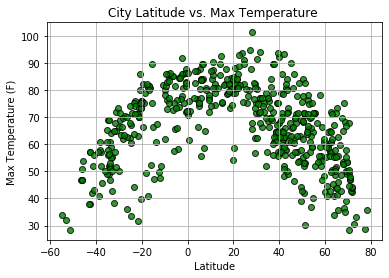

In [10]:
# Creating X and Y Coordinates 
X = WeatherDf2["Lat"]
Y = WeatherDf2["Max_Temp"]
# Display Scatter Plot
plt.scatter(X, Y, marker="o", facecolors="green", edgecolor="black", alpha=0.80)
# Giving The Title 
plt.title ("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

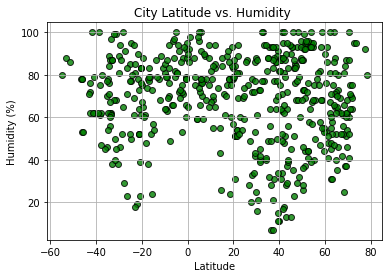

In [11]:
# Define Humidity & Follow Same Way One Cell Above
Y = WeatherDf2["Humidity"]
plt.scatter(X, Y, marker = "o", facecolors = "green", edgecolor = "black", alpha = 0.80)
plt.title  ("City Latitude vs. Humidity ")
plt.ylabel ("Humidity (%)")
plt.xlabel ("Latitude")
plt.grid   (True)
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

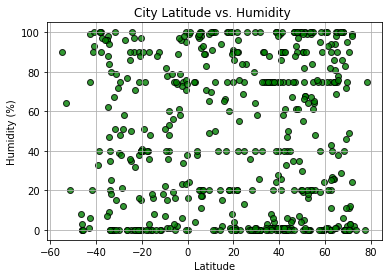

In [12]:
# Define Cloudiness & Follow The Same Way One Cell Above
Y = WeatherDf2["Cloudiness"]
plt.scatter(X, Y, marker = "o", facecolors = "green", edgecolor = "black", alpha=0.80)
plt.title  ("City Latitude vs. Humidity ")
plt.ylabel ("Humidity (%)")
plt.xlabel ("Latitude")
plt.grid   (True)
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

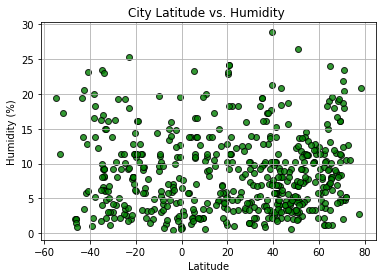

In [13]:
# Define Wind Speed & Follow The Same Way One Cell Above
Y = WeatherDf2["Wind_Speed"]
plt.scatter(X, Y, marker = "o", facecolors = "green", edgecolor = "black", alpha = 0.80)
plt.title  ("City Latitude vs. Humidity ")
plt.ylabel ("Humidity (%)")
plt.xlabel ("Latitude")
plt.grid   (True)
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
    
def LinearReg (x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq      = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize = 15, color = "red")

NorthernHemDf = WeatherDf2.loc[WeatherDf2["Lat"] >= 0]
SouthernHemDf = WeatherDf2.loc[WeatherDf2["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.69


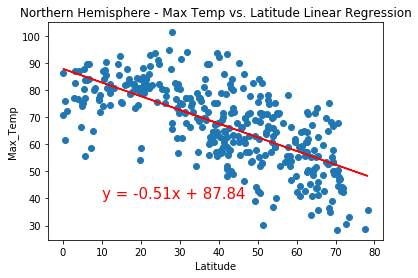

In [15]:
# Define Northern Hemisphere, Max Temp vs Lat
equation  = LinearReg(NorthernHemDf["Lat"], NorthernHemDf["Max_Temp"])
annotate  (equation, 10, 40)
# Giving The Title
plt.title ("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max_Temp")
# Save the figure
plt.savefig("../output_data/Northern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7


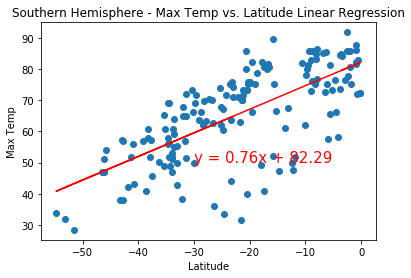

In [16]:
# Define Southern Hemisphere & Follow The Same Way One Cell Above
equation = LinearReg(SouthernHemDf["Lat"],SouthernHemDf["Max_Temp"])
annotate  (equation, -30, 50)
plt.title ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/Southern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.11


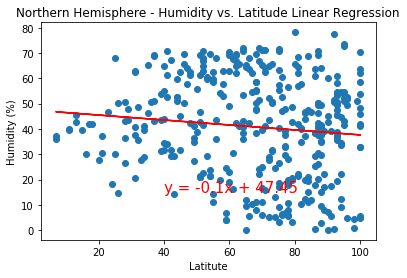

In [17]:
# Define Northern Hemisphere, Humidity(%) vs Lat
equation   = LinearReg(NorthernHemDf["Humidity"], NorthernHemDf["Lat"])
annotate   (equation, 40, 15)
plt.title  ("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel ("Latitute")
plt.ylabel ("Humidity (%)")
plt.savefig("../output_data/ Northern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


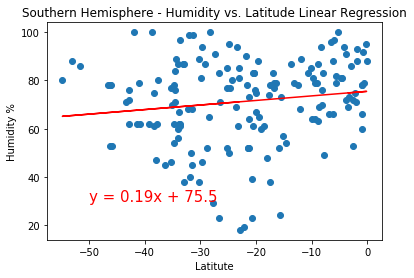

In [18]:
# Define Southern Hemisphere, Humidity(%) vs Latitude
equation   = LinearReg(SouthernHemDf["Lat"], SouthernHemDf["Humidity"])
annotate   (equation, -50, 30)
plt.title  ("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel ("Latitute")
plt.ylabel ("Humidity %")
plt.savefig("../output_data/Southern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.05


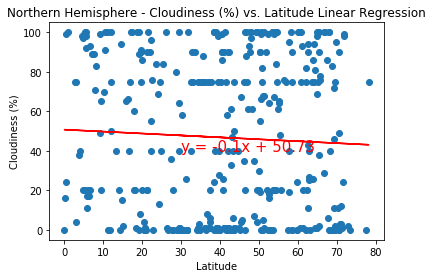

In [19]:
# Define Northern Hemisphere, Cloudiness (%) vs. Latitude
equation   = LinearReg(NorthernHemDf["Lat"], NorthernHemDf["Cloudiness"])
annotate   (equation, 30, 40)
plt.title  ("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.savefig("../output_data/Northern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.0


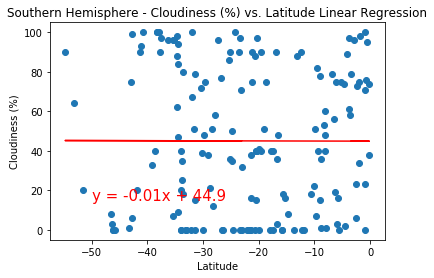

In [20]:
# Define Southern Hemisphere - Cloudiness (%) vs. Latitude 
equation   = LinearReg(SouthernHemDf["Lat"], SouthernHemDf["Cloudiness"])
annotate   (equation, -50, 15)
plt.title  ("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.savefig("../output_data/Southern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


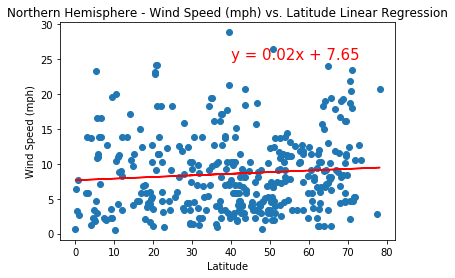

In [21]:
# Define Northern Hemisphere, Wind Speed (mph) vs. Latitude
equation   = LinearReg(NorthernHemDf["Lat"], NorthernHemDf["Wind_Speed"])
annotate   (equation, 40, 25)
plt.title  ("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig("../output_data/Northern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.16


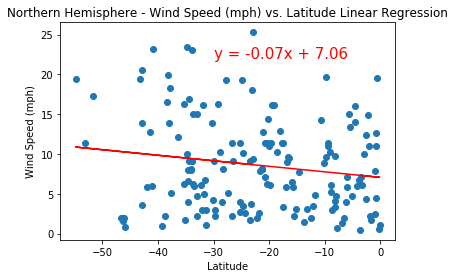

In [22]:
# Define Southern Hemisphere, Wind Speed (mph) vs. Latitude
equation   = LinearReg(SouthernHemDf["Lat"], SouthernHemDf["Wind_Speed"])
annotate   (equation, -30, 22)
plt.title  ("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig("../output_data/Southern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")